In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#Import tables from Data and convert them to dataframes.
reveal_data =  pd.read_csv("Data/Reveal_EEO1_for_2016.csv")
tech_sector_data = pd.read_csv("Data/Tech_sector_diversity_demographics_2016.csv")
reveal_data_df = pd.DataFrame(reveal_data)
tech_sector_data_df = pd.DataFrame(tech_sector_data)

In [3]:
female_data = tech_sector_data_df[tech_sector_data_df["gender"]=="Female"]
female_data_professionals = female_data[female_data["job_category"]=="Professionals"]

female_data = tech_sector_data_df[tech_sector_data_df["gender"]=="Female"]
female_data_managers = female_data[female_data["job_category"]=="Managers"]

female_data = tech_sector_data_df[tech_sector_data_df["gender"]=="Female"]
female_data_executives = female_data[female_data["job_category"]=="Executives"]

# #Convert count column's values to numerric.
female_data_professionals ["count"] = pd.to_numeric(female_data_professionals["count"])
female_data_professionals.dtypes

job_category       object
race_ethnicity     object
gender             object
count               int64
percentage        float64
dtype: object

In [4]:
# Calculate the Number of Employment levels
position_demographics = reveal_data.loc[:, ["job_category"]]
position_demographics = position_demographics.drop_duplicates()
num_positions = position_demographics.count()[0]

# Display the total number of positions
pd.DataFrame({"Total Positions": [num_positions]})


,Total Positions
0,12


In [5]:
# tech_sector_data_df = tech_sector_data_df.loc[reveal_data_df["count"] != "na",:]
tech_sector_data.dropna()
tech_sector_data_df["count"]= pd.to_numeric(tech_sector_data_df["count"])
tech_sector_data_df

# Run basic calculations
# employment_level_counts = tech_sector_data_df.groupby("job_category")["count"].sum().to_frame().reset_index()

tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["job_category"].isin(["Professionals", "Managers","Executives"])]


In [6]:
employment_level_counts = tech_sector_data_df[["job_category","count"]]
job_counts = employment_level_counts.groupby("job_category").sum()
job_counts

,count
job_category,
Executives,37041
Managers,309711
Professionals,1027141


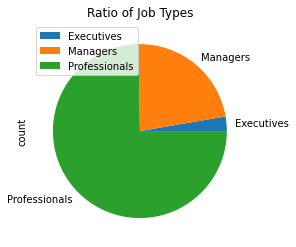

In [7]:
job_counts.plot(kind="pie",y="count",)
plt.title("Ratio of Job Types")
plt.show()

In [8]:
# Run basic calculations
gender_data = tech_sector_data_df.groupby("job_category")["count"].sum().to_frame().reset_index()
gender_data = tech_sector_data_df.groupby("gender")["count"].sum().to_frame().reset_index()

tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["job_category"].isin(["Professionals", "Managers","Executives"])]
tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["gender"].isin(["Female", "Male","Both"])]

gender_data

,gender,count
0,Both,461175
1,Female,261229
2,Male,651489


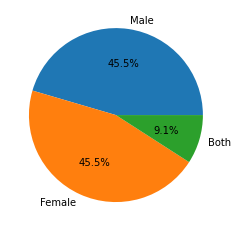

In [9]:
counts =tech_sector_data_df.gender.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

plt.show()